# SSIM

In [5]:
import pytorch_ssim
import torch
from torch.autograd import Variable

img1 = Variable(torch.rand(1, 1, 256, 256))
img2 = Variable(torch.rand(1, 1, 256, 256))

if torch.cuda.is_available():
    img1 = img1.to(torch.device('cuda:0'))
    img2 = img2.cuda(0)

print(pytorch_ssim.ssim(img1, img2))

ssim_loss = pytorch_ssim.SSIM(window_size = 11)

print(ssim_loss(img1, img2))


tensor(0.0176, device='cuda:0')
tensor(0.0176, device='cuda:0')


In [12]:
help(torch.randn)

Help on built-in function randn in module torch:

randn(...)
    randn(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with random numbers from a normal distribution
    with mean `0` and variance `1` (also called the standard normal
    distribution).
    
    .. math::
        \text{out}_{i} \sim \mathcal{N}(0, 1)
    
    The shape of the tensor is defined by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword args:
        generator (:class:`torch.Generator`, optional): a pseudorandom number generator for sampling
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see 

In [2]:
import urllib.request
from PIL import Image
import numpy as np

# 图像 URL
url = 'https://upload.wikimedia.org/wikipedia/commons/3/3e/Einstein_1921_by_F_Schmutzer_-_restoration.jpg'
# 下载图像
req = urllib.request.urlopen(url)
image = Image.open(req)

# 转换为 NumPy 数组
img_array = np.array(image)

# 显示图像数组的形状
print(img_array.shape)

(3313, 2523, 3)


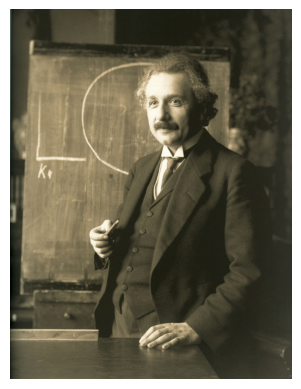

In [3]:
import matplotlib.pyplot as plt
# 显示图像
plt.imshow(img_array)
plt.axis('off')  # 关闭坐标轴显示
plt.show()

In [6]:
import pytorch_ssim
import torch
from torch.autograd import Variable
from torch import optim
import cv2
import numpy as np


# npImg1 = cv2.imread("einstein.png")

img1 = torch.from_numpy(np.rollaxis(img_array, 2)).float().unsqueeze(0)/255.0
# img1 = torch.randn(1,3,500,500)
img2 = torch.rand(img1.size())

if torch.cuda.is_available():
    img1 = img1.cuda()
    img2 = img2.cuda()


img1 = Variable( img1,  requires_grad=False)
img2 = Variable( img2, requires_grad = True)


# Functional: pytorch_ssim.ssim(img1, img2, window_size = 11, size_average = True)
ssim_value = pytorch_ssim.ssim(img1, img2).item()
print("Initial ssim:", ssim_value)

# Module: pytorch_ssim.SSIM(window_size = 11, size_average = True)
ssim_loss = pytorch_ssim.SSIM()

optimizer = optim.Adam([img2], lr=0.01)

loss_list = []
# while ssim_value < 0.95:
for _ in range(300):
    optimizer.zero_grad()
    ssim_out = -ssim_loss(img1, img2)
    ssim_value = - ssim_out.item()
    print(ssim_value)
    ssim_out.backward()
    optimizer.step()
    loss_list.append(ssim_value)


Initial ssim: 0.009496237151324749
0.009496237151324749
0.010690060444176197
0.01189876813441515
0.013122539035975933
0.014361679553985596
0.015616615302860737
0.016887908801436424
0.01817627064883709
0.01948256604373455
0.020807823166251183
0.02215324342250824
0.0235202144831419
0.02491031400859356
0.026325326412916183
0.027767254039645195
0.029238339513540268
0.03074106201529503
0.03227818012237549
0.033852726221084595
0.03546806424856186
0.03712788596749306
0.03883625194430351
0.040597643703222275
0.04241698235273361
0.04429968073964119
0.046251725405454636
0.04827968403697014
0.05039083585143089
0.052593231201171875
0.05489577725529671
0.05730836093425751
0.05984196811914444
0.06250885128974915
0.06532266736030579
0.06829870492219925
0.07145408540964127
0.0748080313205719
0.07838217169046402
0.08220087736845016
0.08629164844751358
0.09068551659584045
0.0954175591468811
0.10052740573883057
0.106059730052948
0.11206483095884323
0.1185990571975708
0.12572506070137024
0.133511871099472

In [ ]:
# 检查 requires_grad 属性
if x.requires_grad:
    print("x requires gradient")
else:
    print("x does not require gradient")

In [29]:
torch.version.__version__

'1.12.1+cu113'